In [1]:
!pip install pandas_ta

     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/115.1 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/115.1 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/115.1 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/115.1 kB ? eta -:--:--
     ----------------------------- ------- 92.2/115.1 kB 375.8 kB/s eta 0:00:01
     ------------------------------------ 115.1/115.1 kB 395.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=9ae88f141a6965e430ce87c404061b20041790ed5b399bbe6140808938b38446
  Stored in directory: c:\users\markp\appdata\local\pip\cache\wheels\1e\5c\47\759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


In [2]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
import pandas_ta as ta
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [4]:
import MetaTrader5 as mt5
import warnings
warnings.filterwarnings("ignore")
mt5.initialize()
account=51127988
password="Aar2frM7"
server = 'ICMarkets-Demo'

In [166]:
# df = pd.read_csv('HistoricalPrices (1).csv')
def get_rates(pair1, x, tf):
    pair1 = pd.DataFrame(mt5.copy_rates_from_pos(pair1, tf, 0, x))
    pair1['time'] = pd.to_datetime(pair1['time'], unit = 's')
    return pair1[['time', 'open', 'high', 'low', 'close']]

AUDUSD = get_rates('AUDUSD.a', 2000, mt5.TIMEFRAME_D1)

In [167]:
AUDUSD = AUDUSD.rename(columns = {'time': 'Date'})
df = AUDUSD
AUDUSD.head()

,Date,open,high,low,close
0,2016-01-19,0.68630,0.69568,0.68380,0.69050
1,2016-01-20,0.69054,0.69238,0.68277,0.69061
2,2016-01-21,0.69066,0.70170,0.68751,0.69969
3,2016-01-22,0.69964,0.70455,0.69858,0.70020
4,2016-01-25,0.70014,0.70311,0.69487,0.69535


In [168]:
#WSJ 
df.head()

,Date,open,high,low,close
0,2016-01-19,0.68630,0.69568,0.68380,0.69050
1,2016-01-20,0.69054,0.69238,0.68277,0.69061
2,2016-01-21,0.69066,0.70170,0.68751,0.69969
3,2016-01-22,0.69964,0.70455,0.69858,0.70020
4,2016-01-25,0.70014,0.70311,0.69487,0.69535


In [169]:
df['Date'] = pd.to_datetime(df['Date'])

In [170]:
# Sort the DataFrame by 'Date' in ascending order
df = df.sort_values(by='Date')

In [171]:
# Define a function to calculate the rolling average for a given period
def calculate_rolling_average(data, window):
    return data.rolling(window=window)['close'].mean()

In [172]:
df.head()

,Date,open,high,low,close
0,2016-01-19,0.68630,0.69568,0.68380,0.69050
1,2016-01-20,0.69054,0.69238,0.68277,0.69061
2,2016-01-21,0.69066,0.70170,0.68751,0.69969
3,2016-01-22,0.69964,0.70455,0.69858,0.70020
4,2016-01-25,0.70014,0.70311,0.69487,0.69535


In [173]:
# Calculate the closing exchange rate for the current day and the previous days
for i in range(1, 7):
    df[f'Close_D-{i}'] = df['close'].shift(i)

In [174]:
# Calculate the average exchange rate for the last two weeks
df['Two_Week_Avg'] = calculate_rolling_average(df, window=14)

In [175]:
# Calculate the average exchange rate for the last two weeks
df['Two_Week_Avg'] = calculate_rolling_average(df, window=14)

# Calculate the average exchange rate for the last month
df['One_Month_Avg'] = calculate_rolling_average(df, window=30)

In [176]:
df['RSI'] = ta.rsi(df['close'], length=14)

In [177]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [178]:
df[['Date', 'close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4', 'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg']]

,Date,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg
0,2016-01-19,0.69050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-20,0.69061,0.69050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-21,0.69969,0.69061,0.69050,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-22,0.70020,0.69969,0.69061,0.69050,NaN,NaN,NaN,NaN,NaN
4,2016-01-25,0.69535,0.70020,0.69969,0.69061,0.69050,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,2023-09-25,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.64310,0.642159,0.642935
1996,2023-09-26,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.642264,0.642741
1997,2023-09-27,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.642100,0.642504
1998,2023-09-28,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584


In [179]:
# Assuming your DataFrame is named 'df'
df_sorted = df.sort_values(by='Date', ascending=False)

# Reset the index for a clean DataFrame
df_sorted.reset_index(drop=True, inplace=True)

In [180]:
df_sorted.head()

,Date,open,high,low,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI
0,2023-09-29,0.64239,0.65010,0.64063,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.642488,0.642692,49.418102
1,2023-09-28,0.63526,0.64323,0.63448,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584,48.311968
2,2023-09-27,0.63969,0.64090,0.63313,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.642100,0.642504,35.610497
3,2023-09-26,0.64203,0.64306,0.63875,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.642264,0.642741,41.145806
4,2023-09-25,0.64372,0.64467,0.64042,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.64310,0.642159,0.642935,45.005059


In [181]:
df = df_sorted.drop(['open', 'high', 'low'], axis=1)

In [182]:
df = df.dropna()

In [183]:
df.head()

,Date,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI
0,2023-09-29,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.642488,0.642692,49.418102
1,2023-09-28,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584,48.311968
2,2023-09-27,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.642100,0.642504,35.610497
3,2023-09-26,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.642264,0.642741,41.145806
4,2023-09-25,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.64310,0.642159,0.642935,45.005059


In [184]:
df.columns

Index(['Date', 'close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4',
       'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg', 'RSI'],
      dtype='object')

In [185]:
features = ['Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4', 'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg']
target = 'close'

In [186]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [187]:
# Create and train a multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [188]:
y_pred = model.predict(X_test)

In [189]:
r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R^2): {r_squared}')

R-squared (R^2): 0.9881012183463811


In [190]:
# Predict the exchange rates using the trained model
df['Predicted_Close'] = model.predict(df[features])

In [191]:
df.head()

,Date,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI,Predicted_Close
0,2023-09-29,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.642488,0.642692,49.418102,0.643412
1,2023-09-28,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584,48.311968,0.635840
2,2023-09-27,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.642100,0.642504,35.610497,0.639767
3,2023-09-26,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.642264,0.642741,41.145806,0.642410
4,2023-09-25,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.64310,0.642159,0.642935,45.005059,0.644269


In [192]:
df.columns

Index(['Date', 'close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4',
       'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg', 'RSI',
       'Predicted_Close'],
      dtype='object')

In [193]:
import matplotlib.pyplot as plt

# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Date': df['Date'], 'Actual_Close': df['close']})

In [194]:
# Calculate and store predicted values for each day from D to D+14
for i in range(6):
    day_column = f'Close_D-{i+1}'
    results_df[f'Predicted_Close_D+{i+1}'] = df[day_column]

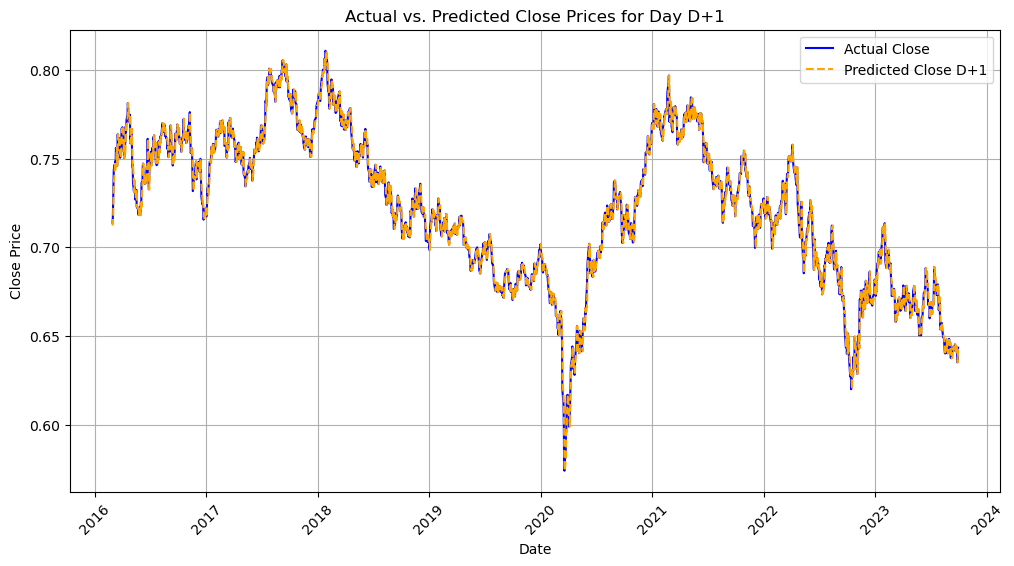

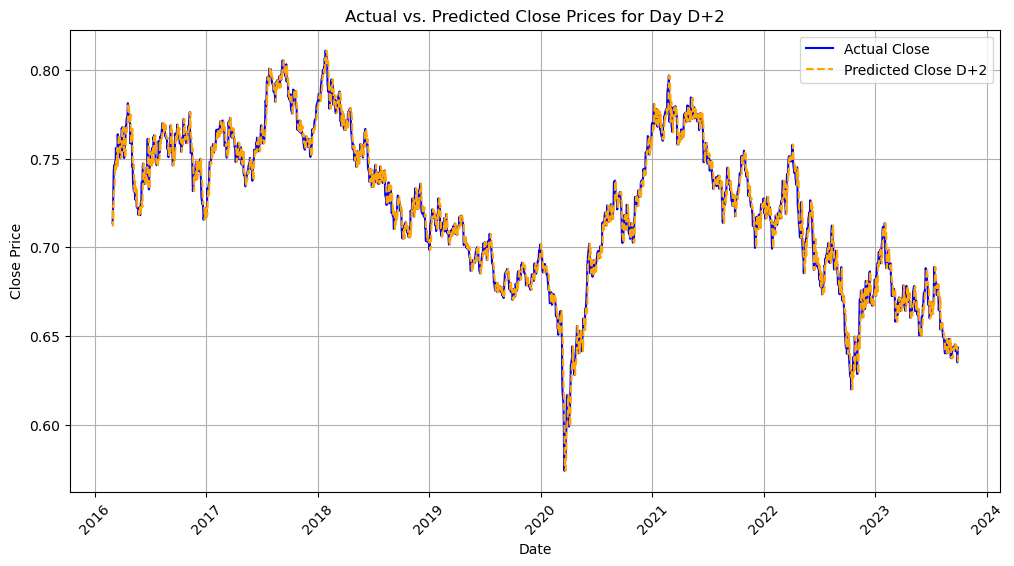

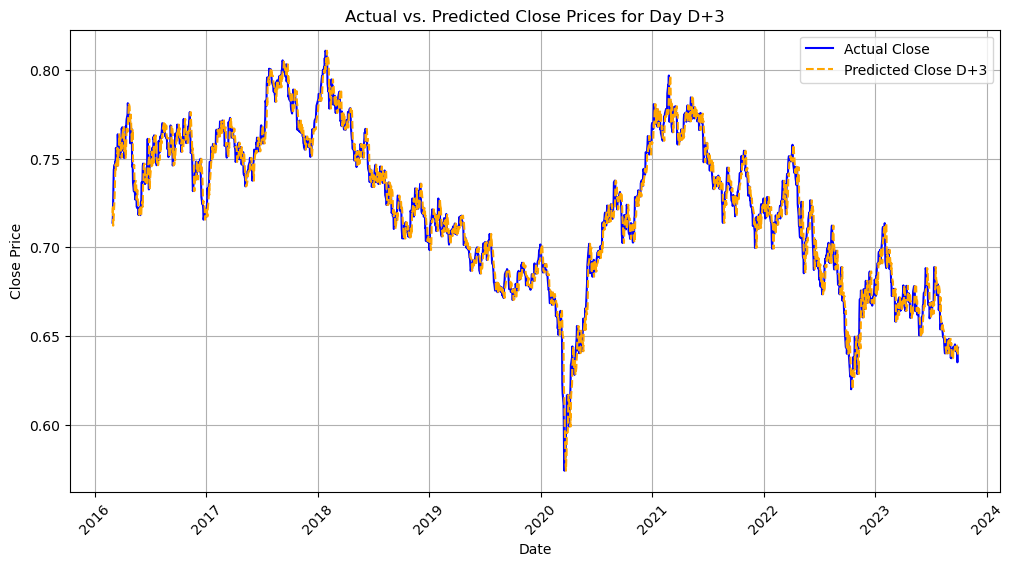

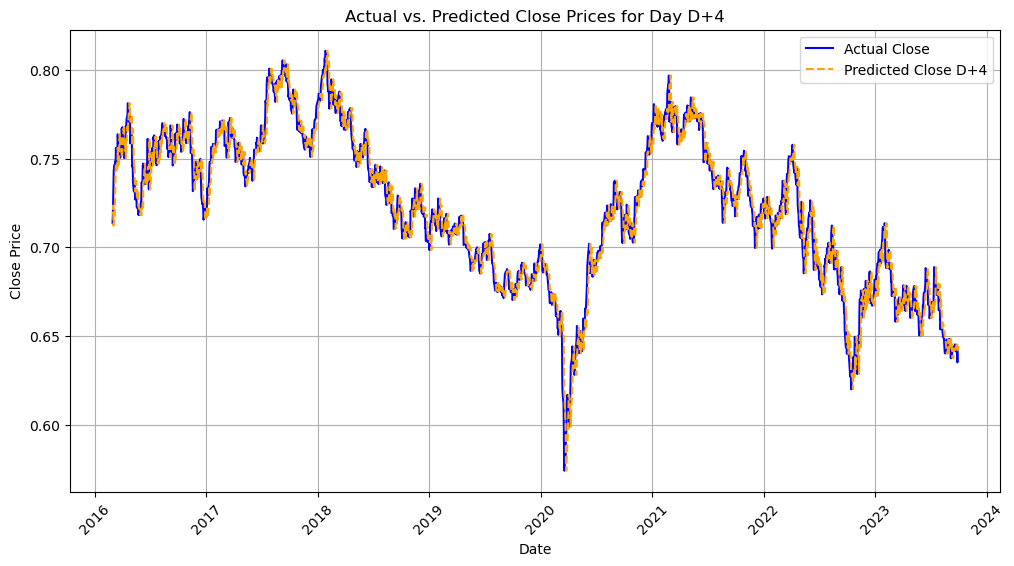

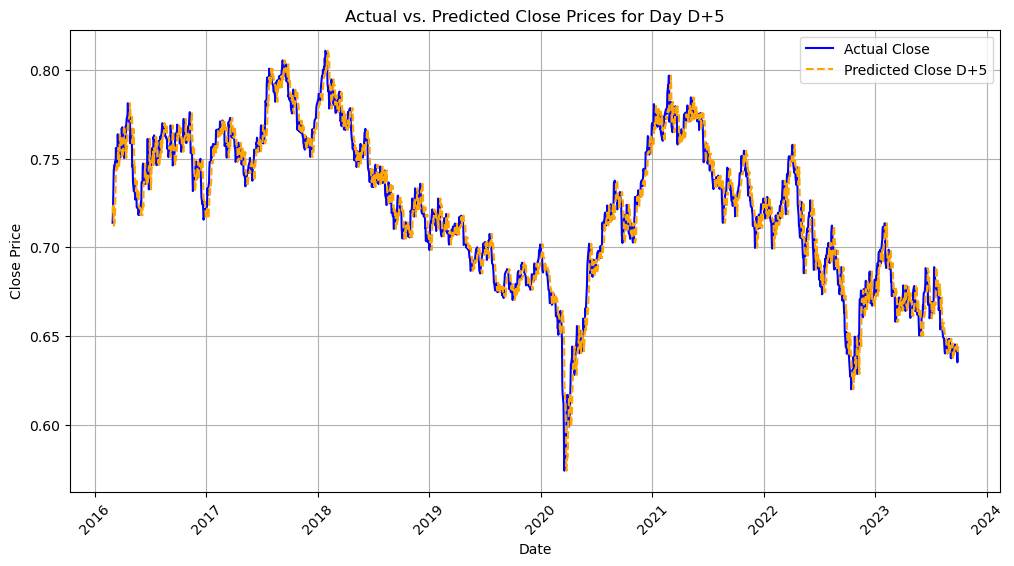

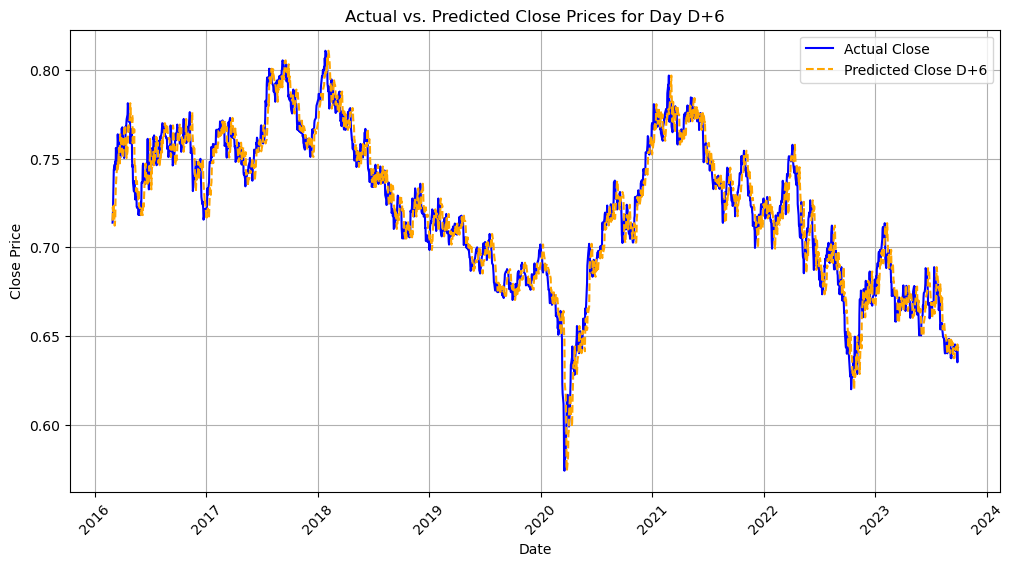

In [195]:
# Calculate and store predicted values for each day from D to D+14
for i in range(6):
    day_column = f'Close_D-{i+1}'

    # Create a new figure for each day's plot
    plt.figure(figsize=(12, 6))

    # Plot the actual close prices
    plt.plot(df['Date'], df['close'], label='Actual Close', color='blue')

    # Plot the predicted close prices for the current day
    plt.plot(df['Date'], df[day_column], label=f'Predicted Close D+{i+1}', linestyle='--', color='orange')

    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Actual vs. Predicted Close Prices for Day D+{i+1}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

    # Save each plot to a separate file or display it
    plt.savefig(f'actual_vs_predicted_D+{i+1}.png')  # Save to a file
    plt.show()  # Display the plot

    # Close the current figure to start a new one for the next day's plot
    plt.close()

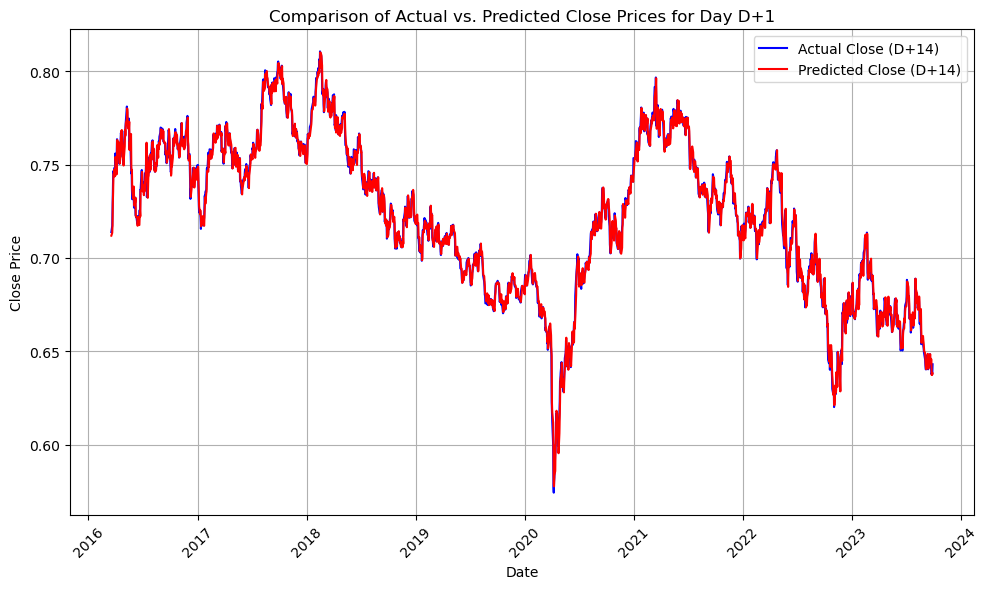

In [196]:

# Plotting for Day D+1
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['close'].shift(-14), label='Actual Close (D+14)', color='blue')
plt.plot(df['Date'], df['Predicted_Close'].shift(-14), label='Predicted Close (D+14)', color='red')
plt.title('Comparison of Actual vs. Predicted Close Prices for Day D+1')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [197]:
from sklearn.metrics import r2_score

for i in range(6):
    day_column = f'Close_D-{i+1}'
    actual_values = df['close']
    predicted_values = df[day_column]

    r_squared = r2_score(actual_values, predicted_values)

    print(f'R-squared (R^2) for Day D+{i+1}: {r_squared}')


R-squared (R^2) for Day D+1: 0.9886316922915404
R-squared (R^2) for Day D+2: 0.9773064747206163
R-squared (R^2) for Day D+3: 0.9661904090526052
R-squared (R^2) for Day D+4: 0.954878428475264
R-squared (R^2) for Day D+5: 0.9432623752904111
R-squared (R^2) for Day D+6: 0.9320848228082784


In [198]:
from sklearn.metrics import r2_score

day_shift = 1
day_column = 'close'  # You can change this if needed
actual_values = df['close']
predicted_values = df[day_column].shift(-day_shift)

r_squared = r2_score(actual_values[:-day_shift], predicted_values.dropna())

print(f'R-squared (R^2) for Day D+{day_shift}: {r_squared}')

R-squared (R^2) for Day D+1: 0.9886322870885791


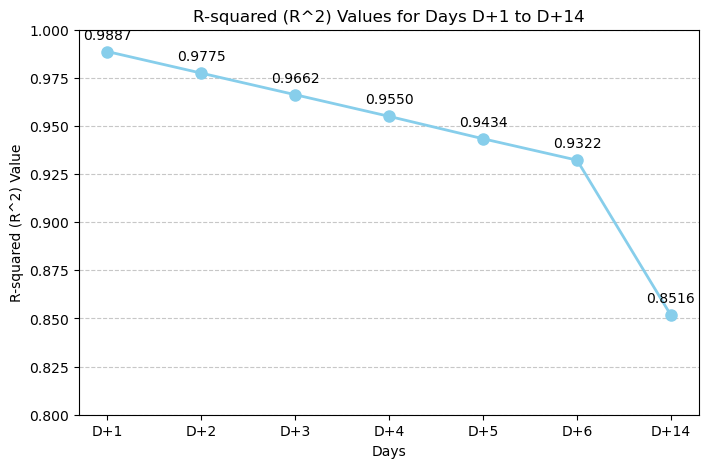

In [199]:
import matplotlib.pyplot as plt

# R-squared values
r_squared_values = [0.9886610897418437, 0.9774519897783448, 0.9662400666904912,
                    0.9549905600566961, 0.9433566867291308, 0.9322389530800326,0.8516251744224493]

# Days D+1 to D+6
days = ['D+1', 'D+2', 'D+3', 'D+4', 'D+5', 'D+6','D+14']

# Create a line plot
plt.figure(figsize=(8, 5))
plt.plot(days, r_squared_values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Days')
plt.ylabel('R-squared (R^2) Value')
plt.title('R-squared (R^2) Values for Days D+1 to D+14')
plt.ylim(0.8, 1.0)  # Set y-axis limits if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the R-squared values as labels on the data points
for i, value in enumerate(r_squared_values):
    plt.text(days[i], value + 0.005, f'{value:.4f}', ha='center', va='bottom')

plt.show()


In [200]:
import numpy as np
import scipy.optimize as opt

# Define the objective function to minimize (MSE)
def objective(params):
    predicted = np.dot(X_test, params)
    mse = np.mean((predicted - y_test) ** 2)
    return mse

def basin_hopping_opt():
    # Initialize the parameters for optimization (e.g., as all ones)
    initial_params = np.ones(len(features))

    # Use simulated annealing to optimize the parameters
    result = opt.basinhopping(objective, initial_params, niter=100, stepsize=0.5)

    # Get the optimized parameters
    optimized_params = result.x

    # Re-predict using the optimized parameters
    y_pred_optimized = np.dot(X_test, optimized_params)

    # Calculate the coefficient of determination (R^2) for the optimized predictions
    r_squared_optimized = r2_score(y_test, y_pred_optimized)
    print(f'R-squared (R^2) after optimization: {r_squared_optimized}')

def dual_annealing_opt():
    # Initialize the parameters for optimization (e.g., as all ones)
    initial_params = np.ones(len(features))

    # Define bounds
    bounds = [(-5, 5)] * len(initial_params)

    # Use dual_annealing to optimize the parameters
    result = opt.dual_annealing(objective, bounds)

    # Get the optimized parameters
    optimized_params = result.x

    # Re-predict using the optimized parameters
    y_pred_optimized = np.dot(X_test, optimized_params)

    # Calculate the coefficient of determination (R^2) for the optimized predictions
    r_squared_optimized = r2_score(y_test, y_pred_optimized)
    print(f'R-squared (R^2) after optimization: {r_squared_optimized}')
    
print('Basin Hopping:')
basin_hopping_opt()
print('Dual Annealing:')
dual_annealing_opt()

Basin Hopping:
R-squared (R^2) after optimization: 0.9884214587874596
Dual Annealing:
R-squared (R^2) after optimization: 0.9878723623383198


In [219]:
# Get the latest row from your DataFrame
latest_row = df.iloc[0]

# Extract the predicted exchange rate for today (Day D)
predicted_exchange_rate_today = latest_row['Predicted_Close']

# Extract the predicted exchange rate for tomorrow (Day D+1)
predicted_exchange_rate_tomorrow = df['Predicted_Close'].iloc[1]
predicted_exchange_rate_6_days = df['Predicted_Close'].iloc[6]

print(f'Predicted exchange rate for today (Day D): {predicted_exchange_rate_today}')
print(f'Predicted exchange rate for tomorrow (Day D+1): {predicted_exchange_rate_tomorrow}')
print(f'Predicated exchange rate for 6 days (Day+6): {predicted_exchange_rate_6_days}')

Predicted exchange rate for today (Day D): 0.6434123675806706
Predicted exchange rate for tomorrow (Day D+1): 0.6358396234906403
Predicated exchange rate for 6 days (Day+6): 0.6448369794154436


<AxesSubplot:>

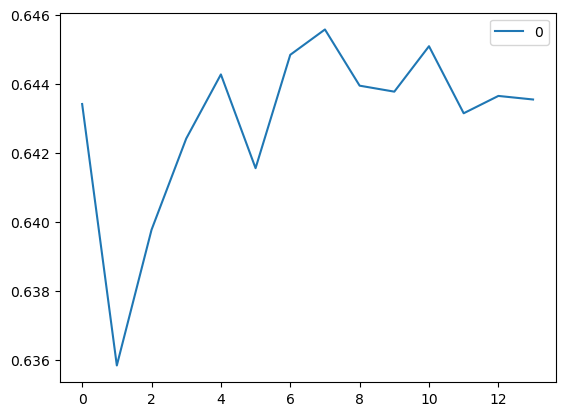

In [218]:
x = []  # Ensure x is a list

for i in range(14):
    a = df['Predicted_Close'].iloc[i]
    x.append(a)  # Now, you're appending to a list

x = pd.DataFrame(x)
x.plot()

In [202]:
df.head()

,Date,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI,Predicted_Close
0,2023-09-29,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.642488,0.642692,49.418102,0.643412
1,2023-09-28,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584,48.311968,0.635840
2,2023-09-27,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.642100,0.642504,35.610497,0.639767
3,2023-09-26,0.63968,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.642264,0.642741,41.145806,0.642410
4,2023-09-25,0.64230,0.64411,0.64154,0.64476,0.64536,0.64368,0.64310,0.642159,0.642935,45.005059,0.644269
